In [1]:
#TREEHACKS 2019!!
#Project by: Kevin Chen, Michelle Xu, Hannah Zhang, and Jason Zhu

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn


from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

# All "low risk" data in this model is entirely fictitious and purely approximated. This is a naive 
# classifier and should be treated as such. This program is meant to be a demo of the potential
# of using logistic regression algorithms to classify whether one location is at risk of 
# wildfire or not

In [2]:
data = pd.read_csv("EnvironmentalData.csv")
print(data.shape)
data.head()

(80, 4)


,temperature,wind_speed,humidity,risk
0,59,2.378938,73,0
1,54,3.956556,71,0
2,52,2.283575,62,0
3,68,3.094654,67,0
4,51,3.273946,71,0


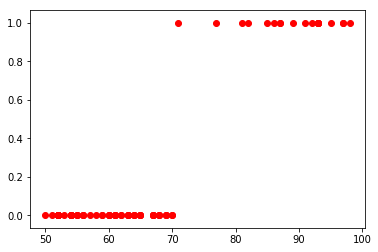

In [3]:
plt.scatter(data.temperature, data.risk,marker='o',color='red')

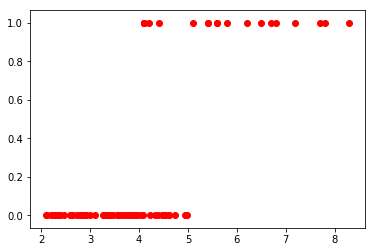

In [4]:
plt.scatter(data.wind_speed, data.risk,marker='o',color='red')

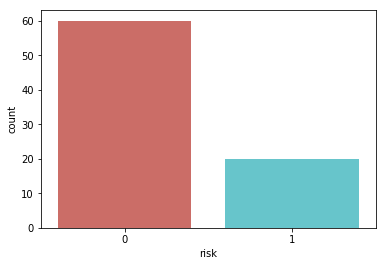

In [5]:
sb.countplot(x='risk',data = data, palette='hls')

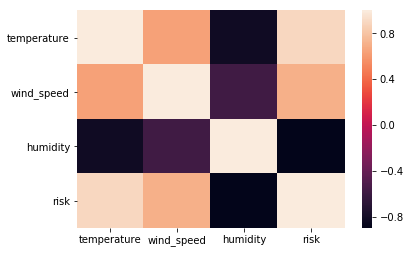

In [6]:
sb.heatmap(data.corr())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
temperature    80 non-null int64
wind_speed     80 non-null float64
humidity       80 non-null int64
risk           80 non-null int64
dtypes: float64(1), int64(3)
memory usage: 2.6 KB


In [8]:
X = data.ix[:,(0,1,2)].values
y = data.ix[:,3].values

/Users/chevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/chevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_train)
print(y_train)

[[60.          3.54699666 62.        ]
 [64.          3.72321496 55.        ]
 [68.          4.97351321 71.        ]
 [55.          2.59373251 54.        ]
 [92.          7.7         0.        ]
 [69.          4.07083302 69.        ]
 [58.          3.59239699 66.        ]
 [95.          6.7         0.        ]
 [65.          2.85748327 63.        ]
 [64.          3.9241503  73.        ]
 [67.          4.52083558 52.        ]
 [64.          3.56042533 71.        ]
 [52.          2.28357549 62.        ]
 [67.          4.37778545 52.        ]
 [61.          3.33690402 76.        ]
 [55.          3.36703857 79.        ]
 [93.          5.4         4.        ]
 [61.          4.6028534  53.        ]
 [61.          2.85145625 65.        ]
 [57.          3.40384784 51.        ]
 [91.          8.3        50.        ]
 [68.          2.78519999 75.        ]
 [54.          2.38200083 52.        ]
 [61.          4.0558522  63.        ]
 [87.          4.4         0.        ]
 [67.          3.76785102

In [10]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = LogReg.predict(X_test)
print(X_test)
print(y_pred)

[[52.          2.10553913 77.        ]
 [60.          4.96610128 77.        ]
 [54.          3.4548163  52.        ]
 [59.          2.3789379  73.        ]
 [97.          4.2         0.        ]
 [63.          2.46984611 69.        ]
 [60.          4.46373285 62.        ]
 [70.          2.73250264 74.        ]
 [50.          4.33338555 63.        ]
 [67.          2.98565282 65.        ]
 [63.          3.96546802 72.        ]
 [97.          4.1         0.        ]
 [98.          5.6         0.        ]
 [54.          2.20125683 53.        ]
 [54.          2.25978357 71.        ]
 [52.          4.49560295 60.        ]
 [93.          4.1         0.        ]
 [65.          2.90213612 76.        ]
 [69.          3.38087837 51.        ]
 [93.          5.4         5.        ]
 [56.          3.6468396  63.        ]
 [65.          4.50318676 70.        ]
 [56.          2.08697057 61.        ]
 [52.          4.93370322 75.        ]]
[0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0]


In [ ]:
import pickle
with open('model', 'wb') as f:
    pickle.dump(LogReg, f)

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[19,  0],
       [ 0,  5]])

In [13]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        24



In [14]:
temp = float(input("What is the temperature? "))
windSpeed = float(input("What is the windSpeed? "))
humidity = float(input("What is the humidity? "))

arr = [temp, windSpeed, humidity]

print(LogReg.predict([arr])) #enter in temperature, wind speed, humidity

What is the temperature? 50
What is the windSpeed? 20
What is the humidity? 1
[1]
